In [71]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute, transpile
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.quantum_info import Statevector
from qiskit.circuit import Gate
from qiskit.quantum_info.operators import Operator
import matplotlib.pyplot as plt

In [78]:
def uf_gate(n):
    num_inputs = 2 ** n
    outputs = [0] * (num_inputs // 2) + [1] * (num_inputs // 2)
    np.random.shuffle(outputs)

    qc = QuantumCircuit(n+1)
    for i, output in enumerate(outputs):
        input_state = format(i, '0' + str(n) + 'b')
        for j, bit in enumerate(input_state):
            if bit == '1':
                qc.x(j)
        if output == 1:
            qc.mcx(list(range(n)), n)
        for j, bit in enumerate(input_state):
            if bit == '1':
                qc.x(j)
    display(qc.draw('mpl'))
    uf_matrix = Operator(qc)
    
    return uf_matrix

In [79]:
def alternative_circuit(n, oracle):
    """Create an alternative quantum circuit."""
    qc = QuantumCircuit(n + 1, n)
    qc.h(range(n))
    
    qc.x(n)
    qc.h(n)
    qc.append(oracle, range(n + 1))
    qc.h(range(n))
    qc.measure(range(n), range(n))
    
    return qc


In [80]:
# The Deutsch-Josza algorithm
# ----------------------------

def dj_algo(qf):
    n = qf.num_qubits
    qc = QuantumCircuit(n,n-1)
    init = Statevector.from_int(2**(n-1),2**n)
    qc.initialize(init)
    qc.h(range(n))
    qc.append(qf,range(n))
    qc.h(range(n-1))
    qc.measure(range(n-1),range(n-1))
    return qc

C:\Users\yosse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


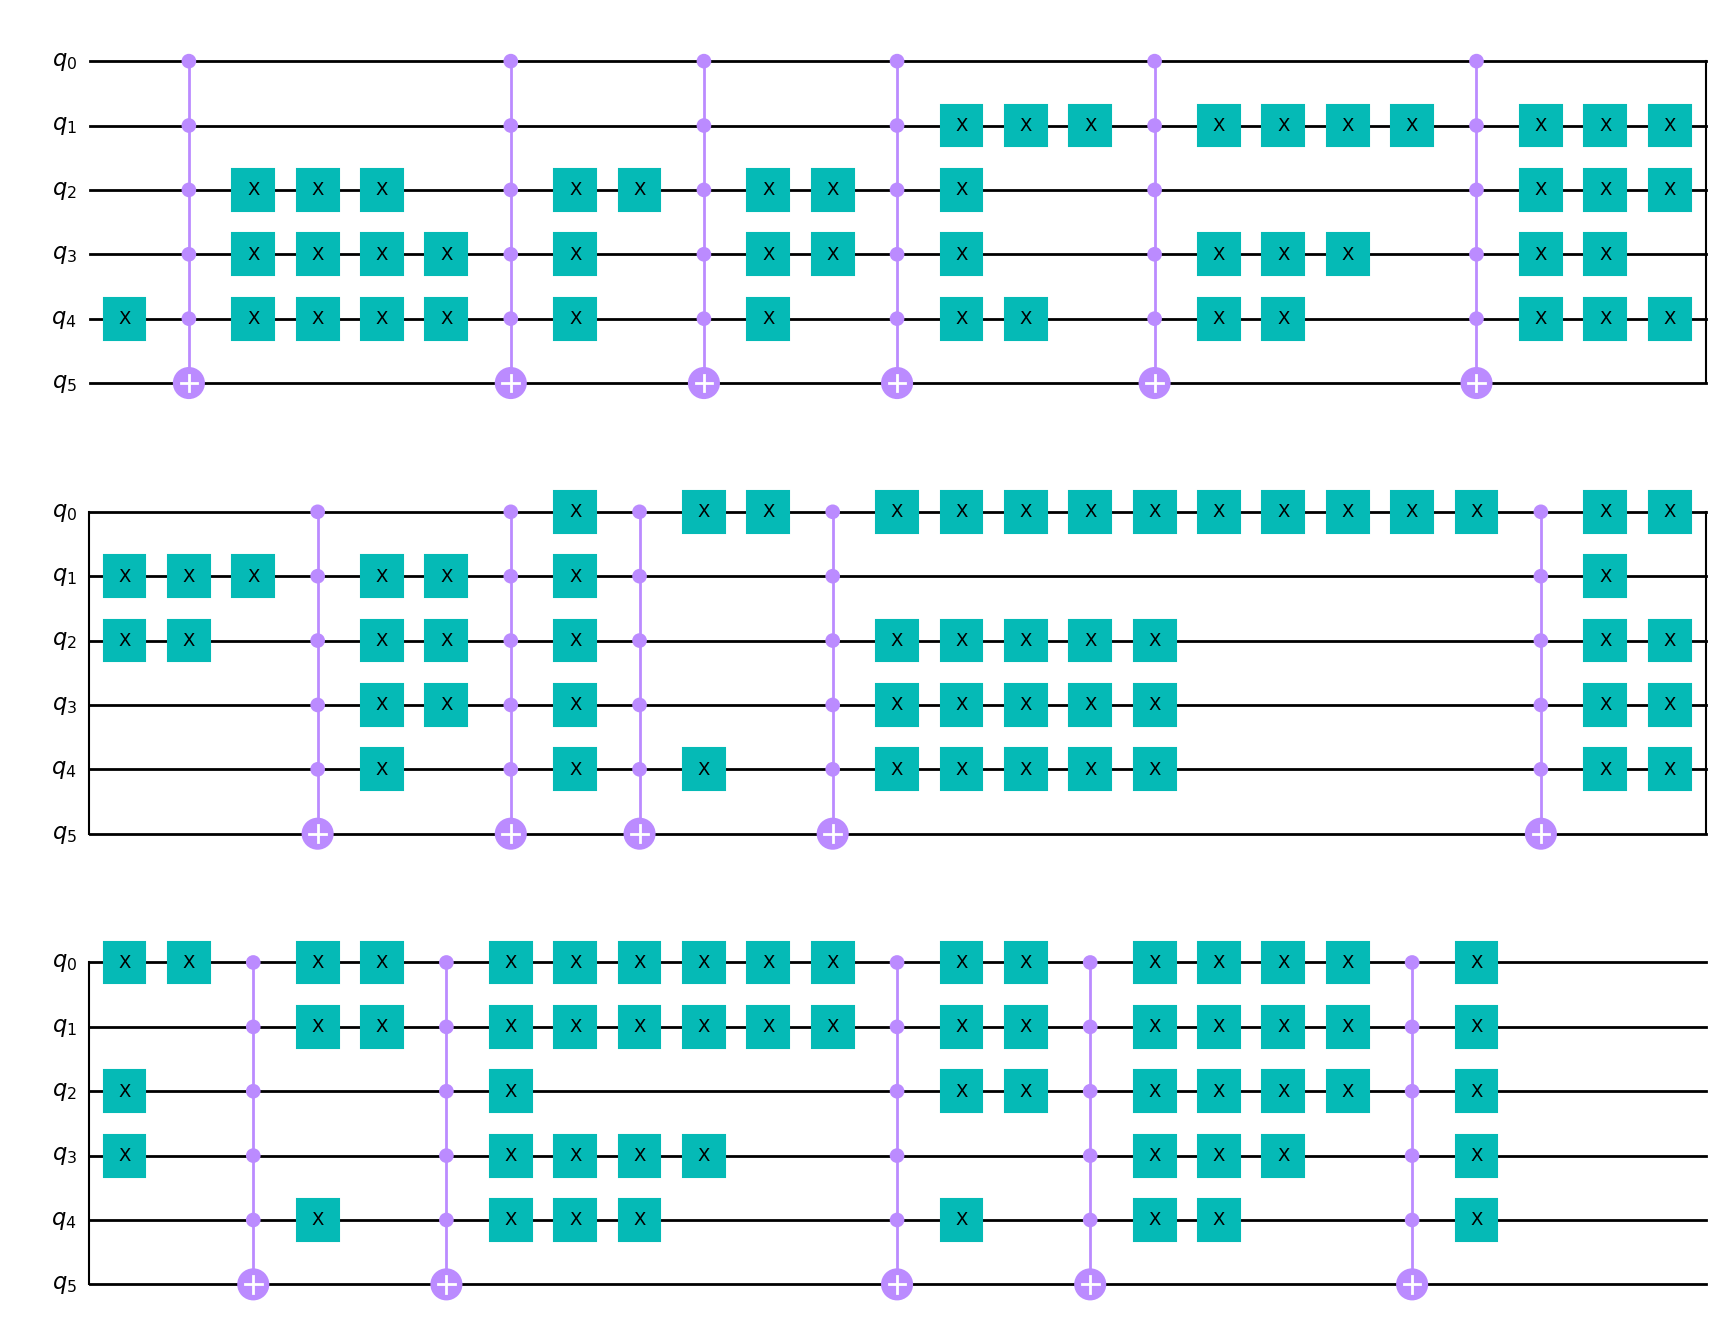

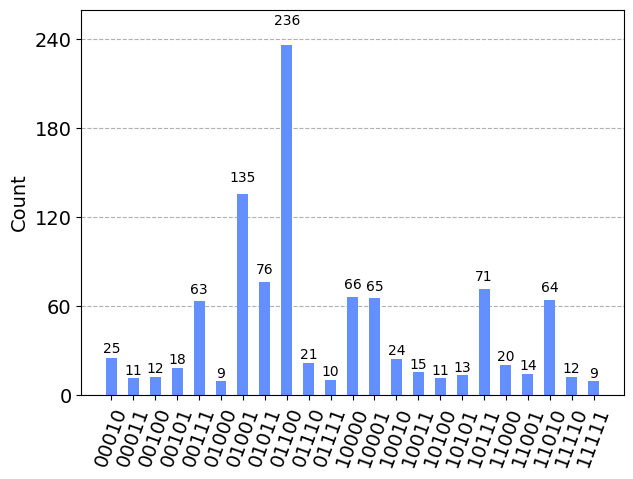

C:\Users\yosse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


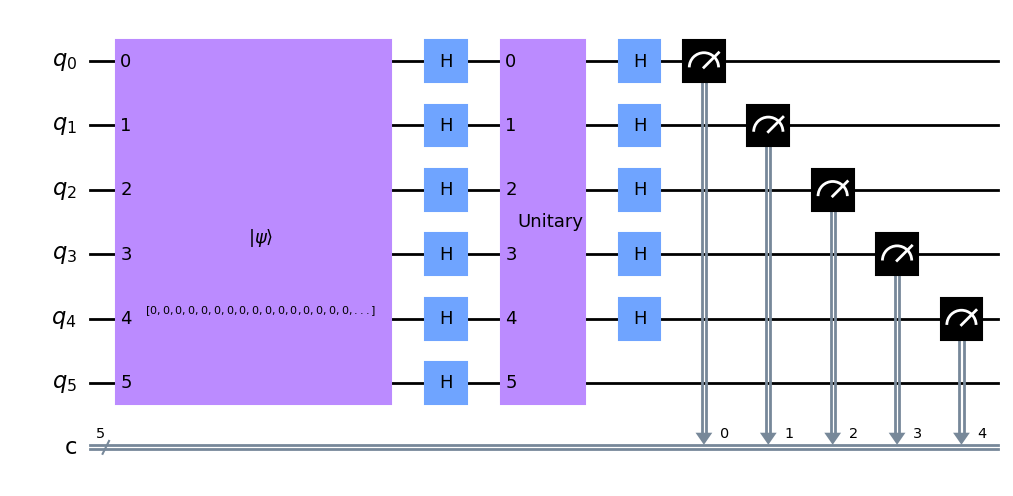

In [83]:
Uf = uf_gate(5)
qc = dj_algo(Uf)


sim = Aer.get_backend('aer_simulator')
shots = 1000
counts = execute(qc, sim, shots=shots).result().get_counts()

display(plot_histogram(counts))
qc.draw(output='mpl')

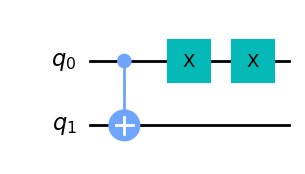

n = 1, Counts: {'1': 1000}


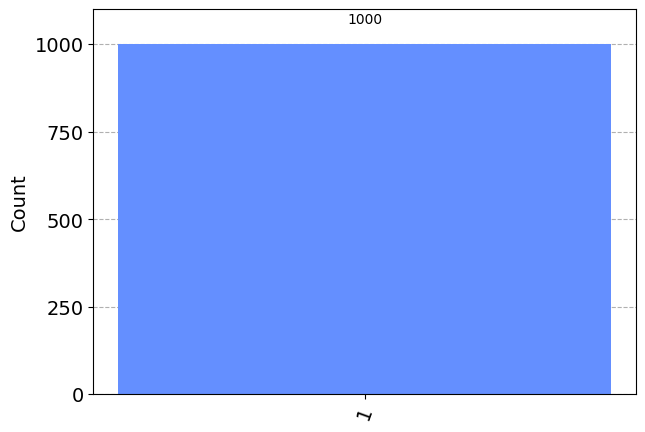

C:\Users\yosse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


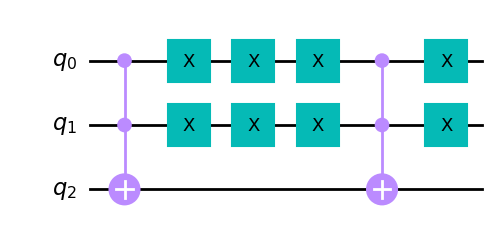

n = 2, Counts: {'11': 1000}


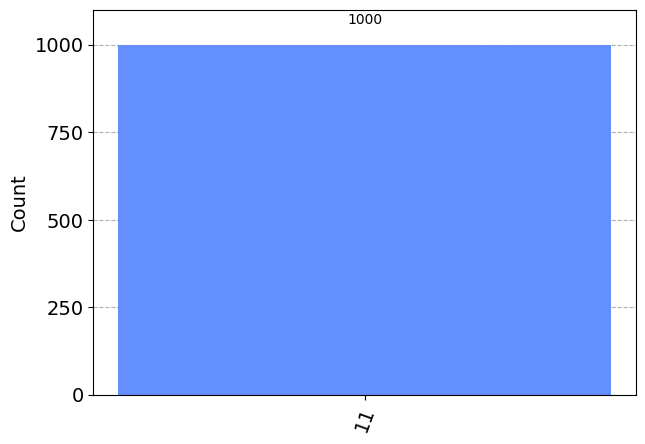

C:\Users\yosse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


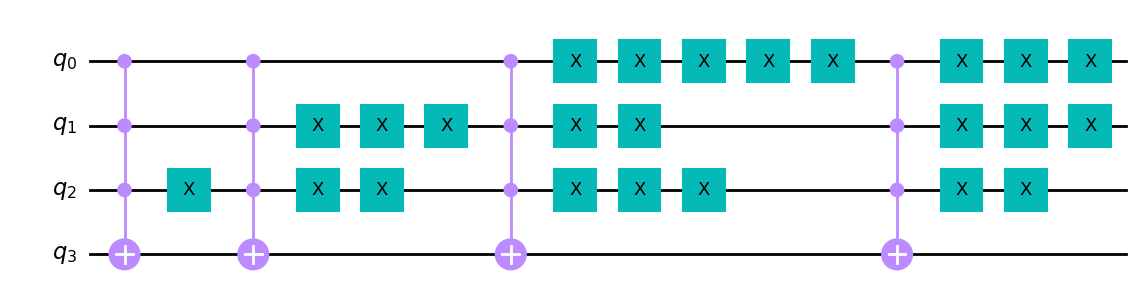

n = 3, Counts: {'101': 243, '111': 230, '001': 282, '011': 245}


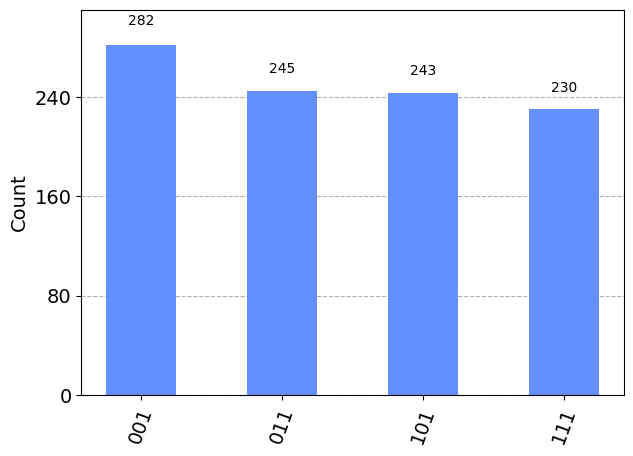

C:\Users\yosse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


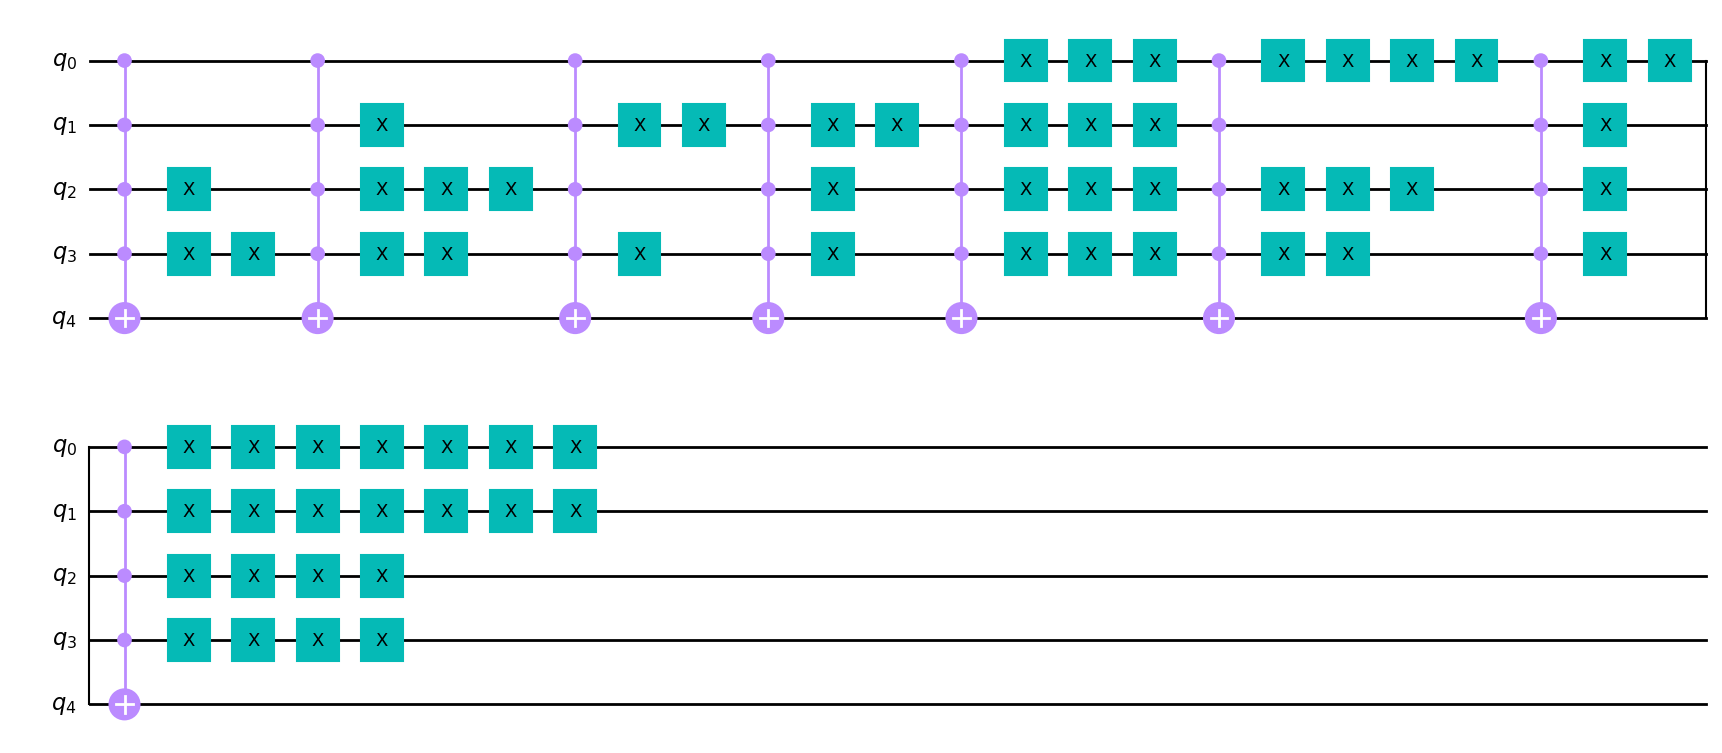

n = 4, Counts: {'0001': 58, '1010': 59, '1001': 266, '1000': 56, '0100': 68, '1011': 254, '0011': 59, '0110': 61, '1111': 63, '1101': 56}


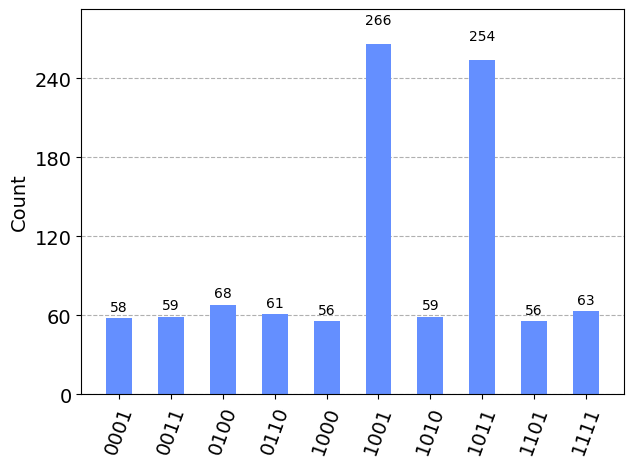

C:\Users\yosse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


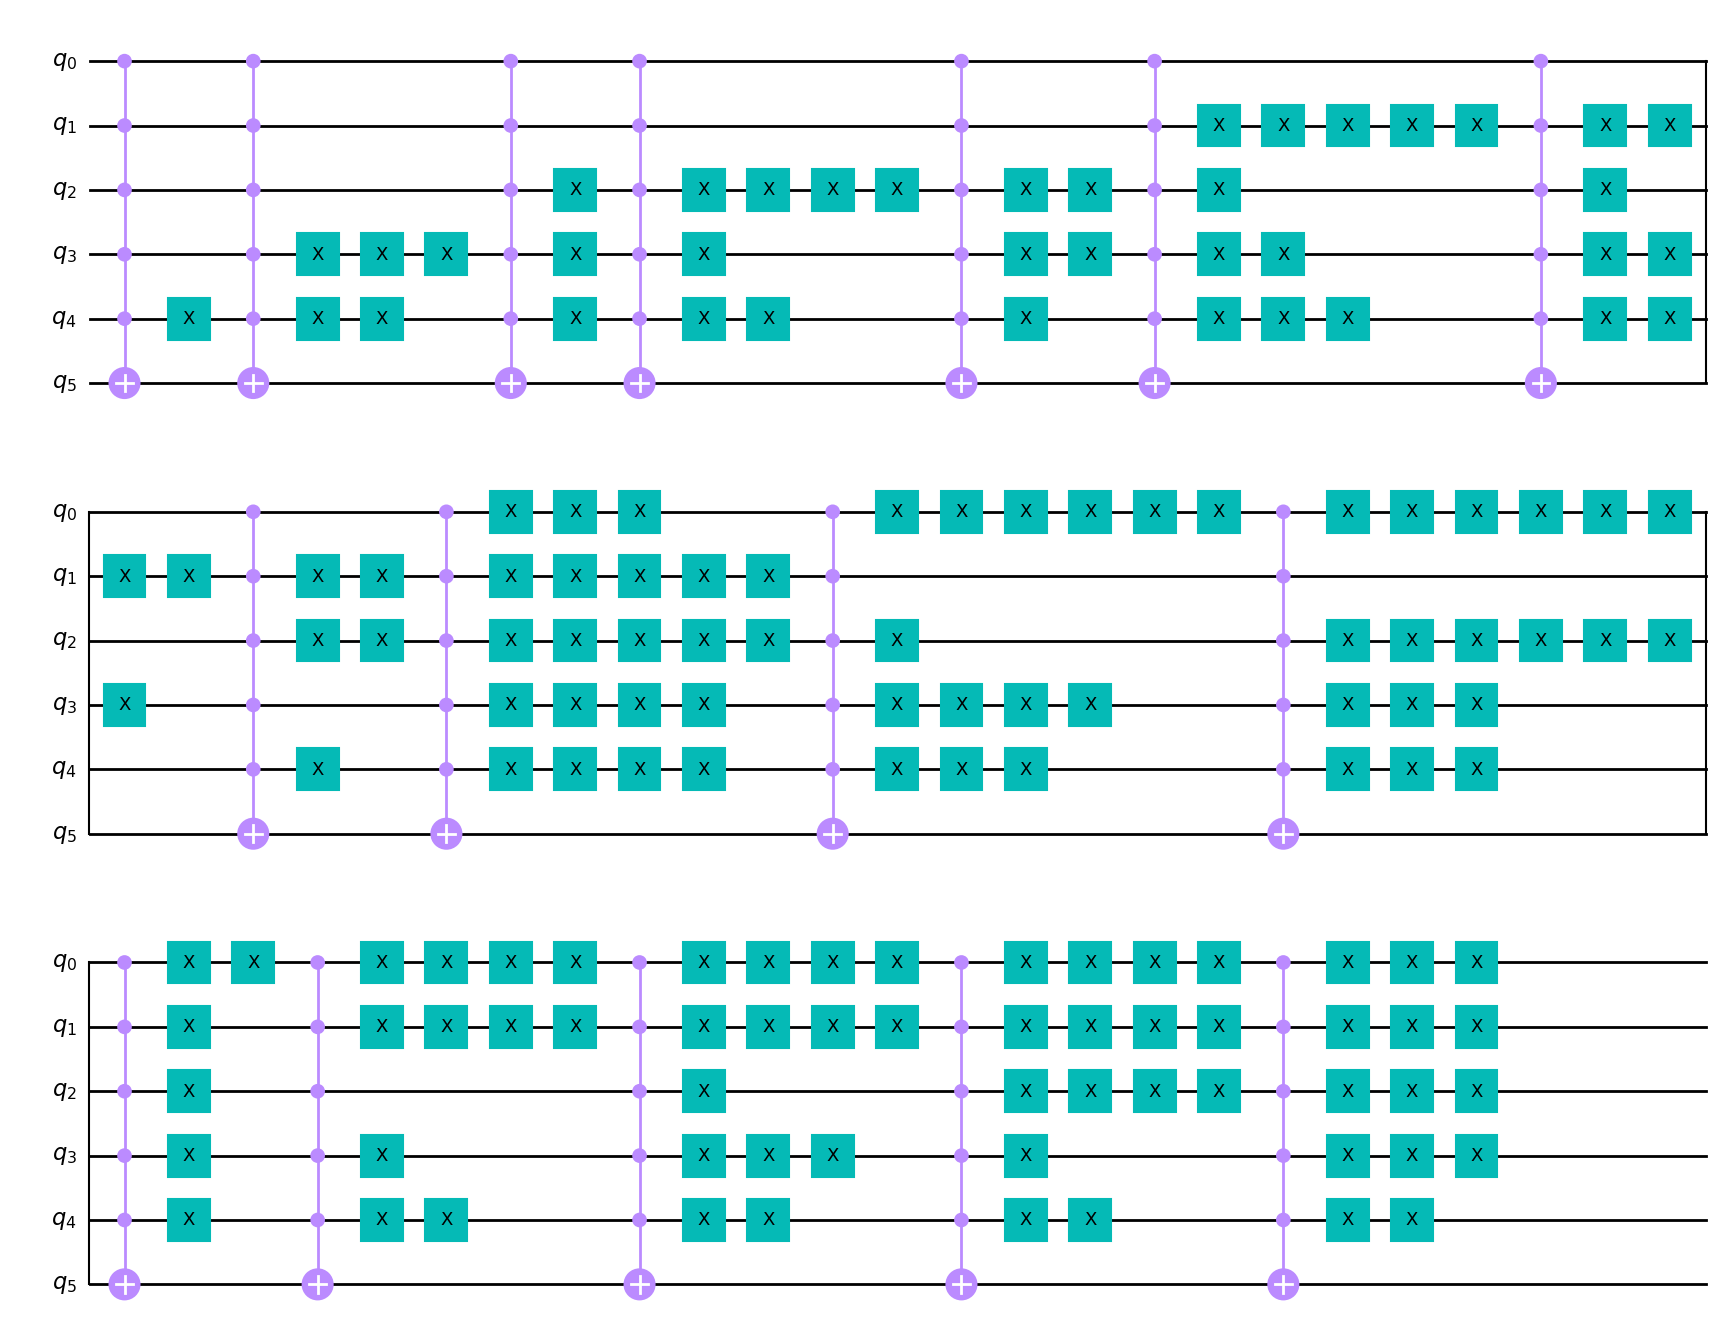

n = 5, Counts: {'11000': 15, '01111': 63, '01000': 22, '10010': 149, '11110': 18, '11111': 80, '11100': 70, '01011': 13, '01101': 15, '01110': 144, '00001': 14, '10111': 15, '00011': 60, '10000': 52, '10110': 50, '10011': 61, '10100': 16, '11010': 64, '10001': 17, '00010': 12, '00111': 15, '11101': 13, '00100': 13, '11011': 9}


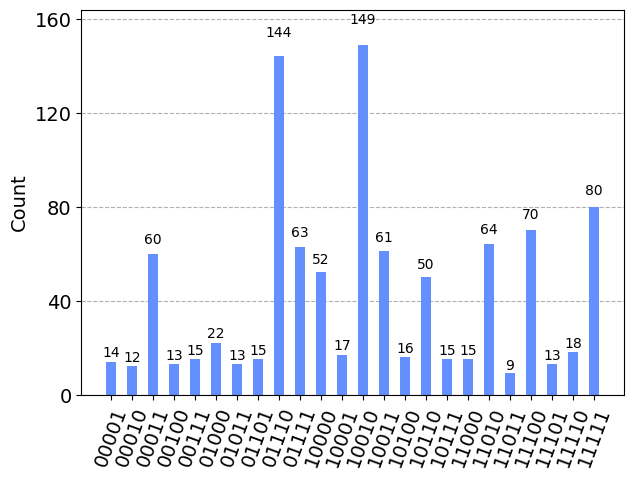

In [82]:
for n in range(1, 6):  # Adjust the range as needed
    Uf = uf_gate(n)
    qc = dj_algo(Uf)

    sim = Aer.get_backend('aer_simulator')
    shots = 1000
    counts = execute(qc, sim, shots=shots).result().get_counts()

    print(f"n = {n}, Counts: {counts}")
    display(plot_histogram(counts))
